# Dividend Amount Prediction

Importing Libraries of Pandas, Numpy and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the csv file of CBA Dividend Amount data (25 Years) from 01/01/1999 to 31/12/2023 collected from Yahoo Finance

In [2]:
div = pd.read_csv(r'C:\Users\Kali\Downloads\CBA_Dividend.AX.csv')
row = 0
for i in div.iterrows():
    row += 1
print(f"Total No. of Row of Data: {row}")
print()
print(div.head(10))

Total No. of Row of Data: 50

         Date  Dividends
0  1999-02-16   0.487359
1  1999-08-18   0.656443
2  2000-02-17   0.576874
3  2000-09-04   0.716120
4  2001-02-19   0.606713
5  2001-08-27   0.745958
6  2002-02-18   0.676336
7  2002-08-26   0.815581
8  2003-02-17   0.686282
9  2003-08-25   0.845420


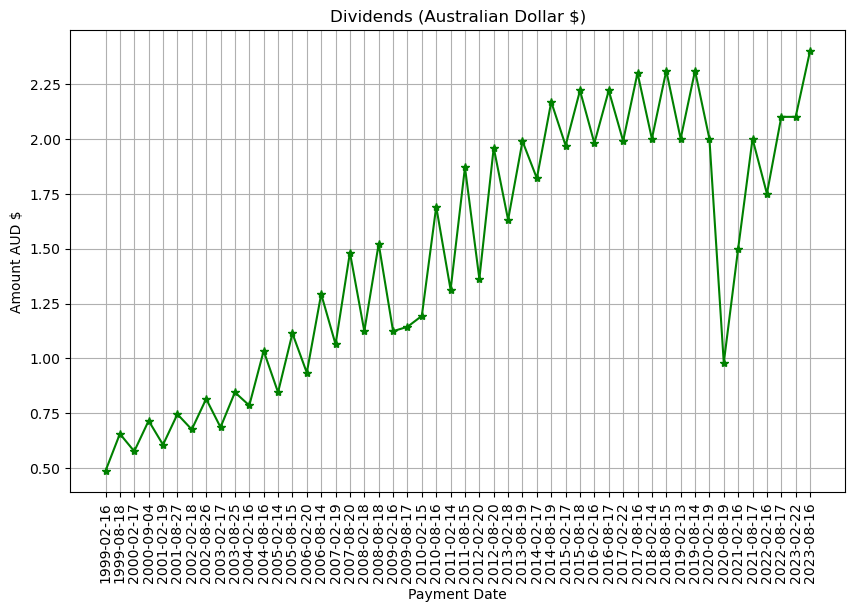

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(div['Date'], div['Dividends'], color = 'green', marker = '*')
plt.grid(True)
plt.title('Dividends (Australian Dollar $)')
plt.xlabel('Payment Date')
plt.ylabel('Amount AUD $')
plt.xticks(rotation=90)
plt.show()

In [4]:
add = pd.DataFrame(div)
add['Date'] = pd.to_datetime(add['Date'])
add['Year'] = add['Date'].dt.year

annual_dividends = add.groupby('Year')['Dividends'].sum().reset_index()
annual_dividends.columns = ['Year','Amount']
row = len(annual_dividends)
print(f"Total No. of Row of Data: {row}")
print(annual_dividends)

Total No. of Row of Data: 25
    Year    Amount
0   1999  1.143802
1   2000  1.292994
2   2001  1.352671
3   2002  1.491917
4   2003  1.531702
5   2004  1.820139
6   2005  1.959385
7   2006  2.227930
8   2007  2.546205
9   2008  2.645666
10  2009  2.267714
11  2010  2.884372
12  2011  3.182756
13  2012  3.322001
14  2013  3.620384
15  2014  3.988390
16  2015  4.189330
17  2016  4.200000
18  2017  4.290000
19  2018  4.310000
20  2019  4.310000
21  2020  2.980000
22  2021  3.500000
23  2022  3.850000
24  2023  4.500000


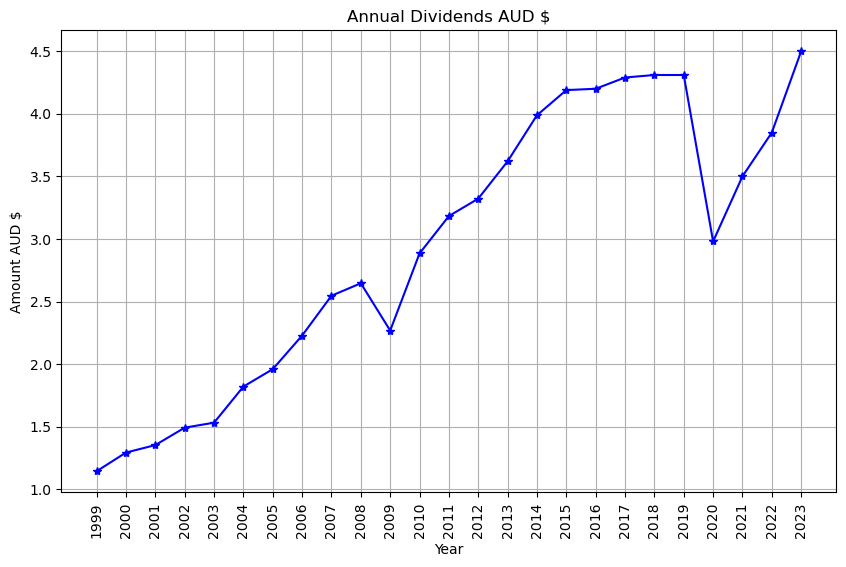

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(annual_dividends['Year'], annual_dividends['Amount'], color='blue', marker = '*')
plt.grid(True)
plt.title('Annual Dividends AUD $')
plt.xlabel('Year')
plt.ylabel('Amount AUD $')
plt.xticks(annual_dividends.Year, rotation=90)
plt.show()

# Machine Learning - Linear regression Model to Predict Dividend Amount

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# DataFrame with Year and Amount
df = pd.DataFrame(annual_dividends)

X = df[['Year']]
y = df['Amount']

# Splitting the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Future predictions
future_year_div = pd.DataFrame({'Year': [2024, 2025, 2026, 2027, 2028]})
predictions_div = model.predict(future_year_div)
print("Future Dividend Amount [2024 - 2028]: ", predictions_div)

# Calculating errors
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Predicting for a user-provided year
year = int(input("Enter a Future Year to Find Dividend Amount: "))
year_div = pd.DataFrame({'Year': [year]})
new_div = model.predict(year_div)
print("The Dividend Amount for One Stock is : $", new_div.item())

# Calculating total dividend for the provided number of stocks
stocks = float(input("Enter the No. of Stocks to Calculate Dividend: "))
amt = new_div.item() * stocks
print(f"The Total Amount of Dividend is $ {amt} for {stocks} stocks")

# Plotting the results
plt.figure(figsize=(10, 6))
X_range = pd.DataFrame({'Year': np.linspace(X['Year'].min(), X['Year'].max(), 100)})
y_range = model.predict(X_range)
plt.plot(X, y, color='blue', label="Actual")
plt.plot(X_range, y_range, color='green', label="Predicted")
plt.plot(future_year_div['Year'], predictions_div, color='red', label="Future", marker = "*")
plt.plot(year_div['Year'], new_div, color="purple", marker="*", label="User")
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Amount $")
plt.title("Actual Vs Predicted Vs Future - Dividend Amount AUD $")
plt.legend()
plt.show()

Future Dividend Amount [2024 - 2028]:  [4.63613813 4.77237164 4.90860515 5.04483866 5.18107217]
Mean Squared Error: 0.3343622206789827
Mean Absolute Error: 0.5614276007515839
